In [3]:
import numpy as np
import emodnetchemistry
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

In [52]:
m = Basemap(projection='ortho',lon_0=5.,lat_0=45,resolution='c')

In [53]:
arctic = Region(-44.25, 70.0, 56.5, 83.0, 0.25, 0.125, "Arctic region")
atlantic = Region(-42.0, -0.1, 24.9, 48.0, 0.1, 0.1, "North-East Atlantic Ocean")
balticsea = Region(9.4, 30.9, 53.0, 65.9, 0.1, 0.1, "Baltic Sea")
blacksea = Region(26.5, 41.95, 40.0, 47.95, 0.05, 0.05, "Black Sea")
mediterranean = Region(-7.0, 36.375, 30.0, 45.875, 0.125, 0.125, "Mediterranean Sea")
northsea = Region(-5.4, 13.0, 47.9, 62.0, 0.1, 0.1, "North Sea")
regionlist = [arctic, atlantic, balticsea, blacksea, mediterranean, northsea]

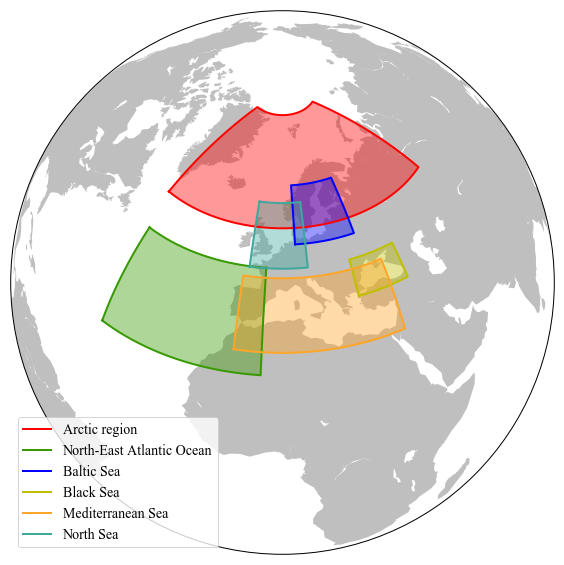

In [54]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
m.fillcontinents(color=".75")

colorlist = ["r", "#389900", "b", "y", "#FFA527", "#3FA89C"]
# Loop on the regions
for region, col in zip(regionlist, colorlist):
    region.get_rect_coords()
    region.get_rect_patch(m, facecolor=col, alpha=0.4)

    m.plot(region.lonvector, region.latvector, color=col, 
           latlon=True, label=region.name, linewidth=2)
    ax.add_patch(region.rect)
plt.legend(fontsize=14)
plt.savefig("../figures/EMODnet_domains05.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()